In [11]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [124]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [125]:
print('x_train : ',x_train.shape)
print('x_test : ',x_test.shape)

K = len(np.unique(y_train))    # classes
print('Number of classes :', K)

x_train :  (50000, 32, 32, 3)
x_test :  (10000, 32, 32, 3)
Number of classes : 10


In [126]:
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = x_train.shape[1]*x_train.shape[1]*3

print('Number of train samples :', Ntr)
print('Number of test samples :', Nte)
print('Dimension of each sample :', Din)

Number of train samples : 50000
Number of test samples : 10000
Dimension of each sample : 3072


In [14]:
labels = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog',
         7:'horse', 8:'ship', 9:'truck'}

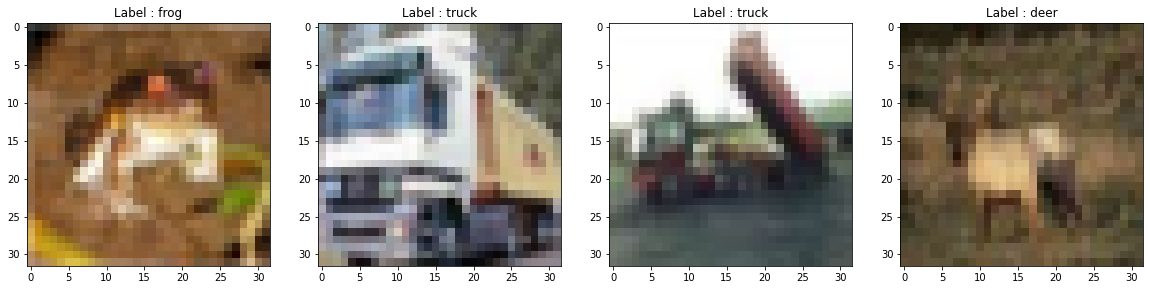

In [7]:
fig, ax = plt.subplots(1, 4, figsize=(20,20))

for i in range(0, 4):
    img = x_train[i]
    ax.ravel()[i].imshow(img)
    ax.ravel()[i].set_title("Label : {}".format(labels.get(y_train[i][0])))

In [127]:
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

mean_image = np.mean(x_train, axis=0)

x_train = x_train - mean_image
x_test = x_test - mean_image

In [128]:
# like one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

print('Shape after one hot encoding :',y_train.shape)

Shape after one hot encoding : (50000, 10)


In [129]:
x_train = np.reshape(x_train,(Ntr,Din))   #flattening
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('Shape of x_train after reshaping :', x_train.shape)

Shape of x_train after reshaping : (50000, 3072)


In [130]:
# initializing weight and bias vectors

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
batch_size = Ntr


print("w1:", w1.shape)
print("b1:", b1.shape)
print('Batch size :', Ntr)

w1: (3072, 10)
b1: (10,)
Batch size : 50000


In [131]:
b1 = b1.reshape(K, 1)
print('Shape of b1 :', b1.shape)

w1 = w1.T
print('Shape of w1 :', w1.shape)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print('Shape of x train :', x_train.shape)
print('Shape of x test :', x_test.shape)
print('Shape of y train :', y_train.shape)
print('Shape of y test :', y_test.shape)

Shape of b1 : (10, 1)
Shape of w1 : (10, 3072)
Shape of x train : (3072, 50000)
Shape of x test : (3072, 10000)
Shape of y train : (10, 50000)
Shape of y test : (10, 10000)


In [132]:
# Bias Trick 
# Simplifies two parameters W,b into a one matrix. This way our model only has to learn one weight matrix instead of two separate matrices.
# We combine W and b into a single matrix and also add an extra column that always hold 1.

W = np.append(w1, b1, axis=1)
print('New weight matrix shape: ',W.shape)

x_train_new = np.append(x_train, np.ones((1, x_train.shape[1])), axis=0)
x_test_new = np.append(x_test, np.ones((1, x_test.shape[1])), axis=0)

print('Rearranged x_train: ', x_train_new.shape)

New weight matrix shape:  (10, 3073)
Rearranged x_train:  (3073, 50000)


In [ ]:
iterations = 300 
lr = 0.05
lr_decay= 0.999
reg = 5e-6
lr_hitory = []
loss_history = [] # Vlaues of loss function at each iteration 
train_acc_history = [] # Training accuracy
val_acc_history = [] # Validation accuracy
seed = 0

m = x_train_new.shape[1]  # Number of training examples

rng = np.random.default_rng(seed=seed)

for t in range(iterations):
  indices = np.arange(Ntr)
  rng.shuffle(indices)

  # Forward pass
  scores = W.dot(x_train_new)
  loss_func = (1/m)*np.sum((scores - y_train)**2) + (1/m)*reg*np.sum(W**2)
  loss_history.append(loss_func)
  
  # Backward pass
  # Printing accuracies and displaying w as images
